In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
 uploaded = files.upload()

Saving Nifty500_2017-2022.xlsx - Sheet1.csv to Nifty500_2017-2022.xlsx - Sheet1.csv


In [ ]:
df=pd.read_csv('Nifty500_2017-2022.xlsx - Sheet1.csv')

In [ ]:
df.describe()

,Open,High,Low,Close
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,10339.307674,10386.240065,10266.789297,10327.695073
std,2217.316340,2223.197584,2203.272230,2215.032606
min,6299.750000,6556.650000,6151.600000,6243.000000
25%,8986.537500,9016.212500,8928.412500,8976.087500
50%,9453.775000,9482.925000,9402.375000,9441.550000
75%,11461.262500,11517.450000,11381.037500,11460.887500
max,16003.950000,16004.450000,15871.400000,15886.150000


In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,3-Apr-17,8028.55,8057.40,8014.40,8053.15,836437630,19267.02
1,5-Apr-17,8077.85,8100.70,8045.75,8095.10,1073057297,24808.88
2,6-Apr-17,8081.50,8096.25,8056.35,8092.10,944826819,22343.23
3,7-Apr-17,8064.05,8100.50,8035.00,8045.35,988922713,23637.86
4,10-Apr-17,8070.45,8077.95,8038.30,8052.10,781737603,19158.08


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
1233,25-Mar-22,14763.90,14768.30,14590.45,14651.70,1396675558,48378.72
1234,28-Mar-22,14686.25,14694.85,14515.65,14675.85,1547370762,50067.99
1235,29-Mar-22,14744.05,14773.15,14689.60,14761.90,1722624126,48744.91
1236,30-Mar-22,14880.70,14924.75,14823.55,14896.90,2148589897,63379.17
1237,31-Mar-22,14925.55,14963.40,14871.00,14894.50,1815251648,57574.09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1238 non-null   object 
 1   Open               1238 non-null   float64
 2   High               1238 non-null   float64
 3   Low                1238 non-null   float64
 4   Close              1238 non-null   float64
 5   Shares Traded      1238 non-null   object 
 6   Turnover (Rs. Cr)  1238 non-null   object 
dtypes: float64(4), object(3)
memory usage: 67.8+ KB


In [ ]:
#Check for any missing data
df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        8053.15
1        8095.10
2        8092.10
3        8045.35
4        8052.10
          ...   
1233    14651.70
1234    14675.85
1235    14761.90
1236    14896.90
1237    14894.50
Name: Close, Length: 1238, dtype: float64

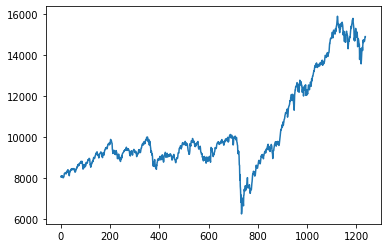

In [ ]:
plt.plot(df1)

In [ ]:
#the original index gets converted to a column.
df2=df.reset_index()['Open']

In [ ]:
df2

0        8028.55
1        8077.85
2        8081.50
3        8064.05
4        8070.45
          ...   
1233    14763.90
1234    14686.25
1235    14744.05
1236    14880.70
1237    14925.55
Name: Open, Length: 1238, dtype: float64

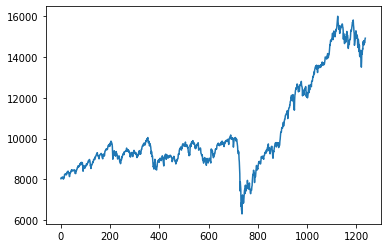

In [ ]:
plt.plot(df2)

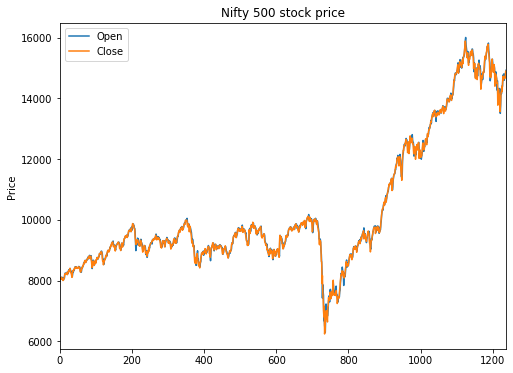

In [ ]:
#plot both the Close and the Open price
title = 'Nifty 500 stock price'
ylabel='Price'
ax = df[['Open','Close']].plot(figsize=(8,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel);

In [ ]:
#Shifting the ‘Close’ price by one day back
df['Daily Lag'] = df['Close'].shift(1)
df.head()


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Daily Lag
0,3-Apr-17,8028.55,8057.40,8014.40,8053.15,836437630,19267.02,NaN
1,5-Apr-17,8077.85,8100.70,8045.75,8095.10,1073057297,24808.88,8053.15
2,6-Apr-17,8081.50,8096.25,8056.35,8092.10,944826819,22343.23,8095.10
3,7-Apr-17,8064.05,8100.50,8035.00,8045.35,988922713,23637.86,8092.10
4,10-Apr-17,8070.45,8077.95,8038.30,8052.10,781737603,19158.08,8045.35


In [ ]:
#Returns that are obtained in a day after the stock price closes
df['Daily Returns'] = (df['Daily Lag']/df['Close']) -1
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Daily Lag,Daily Returns
0,3-Apr-17,8028.55,8057.40,8014.40,8053.15,836437630,19267.02,NaN,NaN
1,5-Apr-17,8077.85,8100.70,8045.75,8095.10,1073057297,24808.88,8053.15,-0.005182
2,6-Apr-17,8081.50,8096.25,8056.35,8092.10,944826819,22343.23,8095.10,0.000371
3,7-Apr-17,8064.05,8100.50,8035.00,8045.35,988922713,23637.86,8092.10,0.005811
4,10-Apr-17,8070.45,8077.95,8038.30,8052.10,781737603,19158.08,8045.35,-0.000838


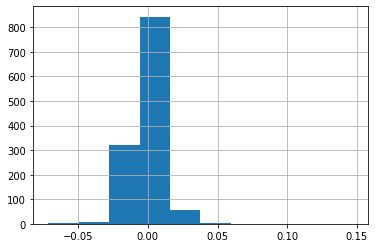

In [ ]:
df['Daily Returns'].hist()

In [ ]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -0.0004293596424132005
Std deviation = 0.01172791028039964


In [ ]:
#generally returns are negative but this only considers the returns on a day-to-day basis and so it just tells that in general the return if we buy and sell on the same day, will make a loss

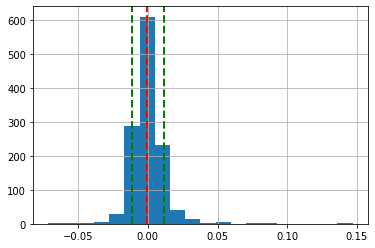

In [ ]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [ ]:
df['Daily Returns'].kurtosis()

27.293846377939552

In [ ]:
#Kurtosis value is positive,indicating that the chance of ‘extreme’ values are rare

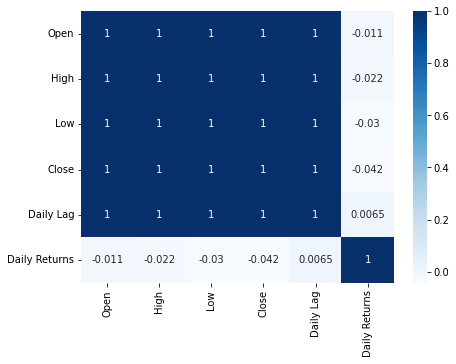

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Daily Lag,Daily Returns,open-high,open-low,close-high,close-low,high-low,open-close
0,3-Apr-17,8028.55,8057.40,8014.40,8053.15,836437630,19267.02,NaN,NaN,-28.85,14.15,-4.25,38.75,43.00,-24.60
1,5-Apr-17,8077.85,8100.70,8045.75,8095.10,1073057297,24808.88,8053.15,-0.005182,-22.85,32.10,-5.60,49.35,54.95,-17.25
2,6-Apr-17,8081.50,8096.25,8056.35,8092.10,944826819,22343.23,8095.10,0.000371,-14.75,25.15,-4.15,35.75,39.90,-10.60
3,7-Apr-17,8064.05,8100.50,8035.00,8045.35,988922713,23637.86,8092.10,0.005811,-36.45,29.05,-55.15,10.35,65.50,18.70
4,10-Apr-17,8070.45,8077.95,8038.30,8052.10,781737603,19158.08,8045.35,-0.000838,-7.50,32.15,-25.85,13.80,39.65,18.35


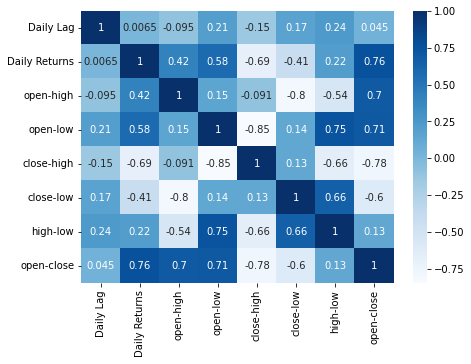

In [ ]:
df3 = df.copy()
df3 = df3.drop(['Open','High','Low','Close', 'Shares Traded'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(df3.corr(),cmap='Blues',annot=True)